# Check links between all calls

In [1]:
import pandas as pd
import numpy as np
from collections import *

from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Read the lstm-reduced features
def read_features(csv_file):
    fd = pd.read_csv(csv_file, header=None)
    labels = fd[fd.columns[0]].values
    features = fd[fd.columns[1:]].values
    return features, labels

def pca_features(features, n_components=2):
    pca = PCA(n_components=2)
    return pca.fit_transform(features)
    
def read_csv_and_pca(csv_file):
    features, labels = read_features(csv_file)
    X = pca_features(features, n_components=2)
    labels_ = set(labels)
    labels_ = dict(zip(labels_, range(len(labels_))))
    call2species = {'1':'PN', '2':'PN', '3':'PN', '4':'PN', 
                    'A':'BM', 'A*':'BM', 'KA':'BM', 'h':'BM', 'p':'BM',
                    'KATR':'BM', 'Nscrm':'BM', 'PY':'BM', 'BO':'BM',
                    'A_titi':'TT', 'B':'TT', 'BS':'TT', 'Bw':'TT',  'C':'TT', 'H':'TT', 'x':'TT',  
                    'H':'CB', 'K':'CB', 'K+':'CB', 'W':'CB', 'W+':'CB', 'K+/W+':'CB',                 
                    'r':'CL', 's':'CL'}
    specie = [call2species[x] for x in labels]
    return pd.DataFrame({'labels':labels,'PC1': X[:,0], 'PC2': X[:,1], 'specie': specie})

def select_species(features, species):
    return features[features['specie'].isin(species)]

def remove_calls(features, calls):
    return features[~features['labels'].isin(calls)]

def translate_bm(features):
    features[features['labels'] == 'p']['labels'] = 'PY'
    features[features['labels'] == 'h']['labels'] = 'KA'
    return features

def trasform_calls(features, calls):
    return remove_calls(translate_bm(features), calls)


# are calls separated in the new space?

In [3]:
lstm = read_csv_and_pca('SPECTRAL_STACK50_NFILT40_6ca96b_ND20_lstm_input.csv')
ae = read_csv_and_pca('SPECTRAL_STACK50_NFILT40_6ca96b_ND20_ae_input.csv')
pca = read_csv_and_pca('SPECTRAL_STACK50_NFILT40_6ca96b_ND20_pca_input.csv')
lda = read_csv_and_pca('SPECTRAL_STACK50_NFILT40_6ca96b_ND20_lda_input.csv')
raw = read_csv_and_pca('SPECTRAL_STACK50_NFILT40_6ca96b_ND20_raw_input.csv')
lsa = read_csv_and_pca('SPECTRAL_STACK50_NFILT40_6ca96b_ND20_lsa_input.csv')
tsne = read_csv_and_pca('SPECTRAL_STACK50_NFILT40_6ca96b_ND20_tsne_input.csv')

In [4]:
species = ['BM', 'PN', 'TT'] # this work
species = ['BM', 'TT', 'CL'] # Maarten paper
lstm = select_species(lstm, species)
ae = select_species(ae, species)
pca = select_species(pca, species)
lda = select_species(lda, species)
raw = select_species(raw, species)
lsa = select_species(lsa, species)
tsne = select_species(tsne, species)

In [5]:
calls = ['A*', 'BO', 'Nscrm', 'x', 'C', 'KATR', 'BS', 'Bw']
lstm = trasform_calls(lstm, calls)
ae = trasform_calls(ae, calls)
pca = trasform_calls(pca, calls)
lda = trasform_calls(lda, calls)
raw = trasform_calls(raw, calls)
lsa = trasform_calls(lsa, calls)
tsne = trasform_calls(tsne, calls)

/home/juan/bin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/juan/bin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# plots by Call type

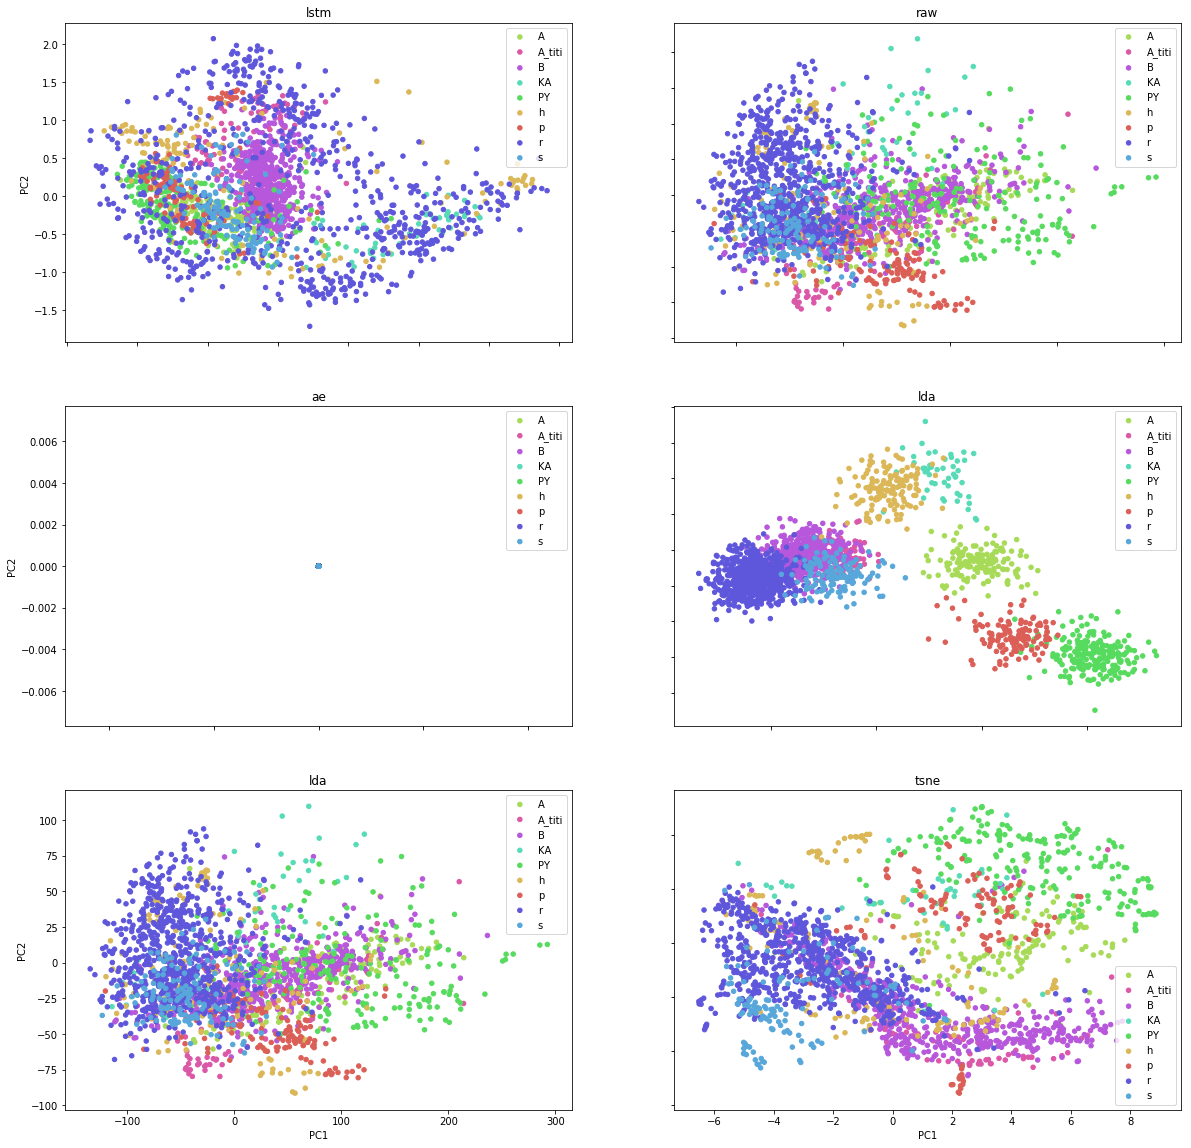

In [9]:
param = {'kind':'scatter', 'x':'PC1', 'y':'PC2', # 'xlim':(0, 1.0), 'ylim':(0,9), 
         'sharex':True, 'sharey':True, 'legend':True, 's':20} 
color_labels = lstm['labels'].unique()
rgb_values = sns.color_palette("hls", len(color_labels))
color_map = dict(zip(color_labels, rgb_values))

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
def do_fig_bylabels(feat, title, x, y):
    grouped = feat.groupby('labels')
    for key, group in grouped:
        group.plot(ax=ax[x,y], label=key, color=group['labels'].map(color_map), title=title,  **param)
    
do_fig_bylabels(lstm, 'lstm', 0, 0)
do_fig_bylabels(raw, 'raw', 0, 1)
do_fig_bylabels(ae, 'ae', 1, 0)
do_fig_bylabels(lda, 'lda', 1, 1)
do_fig_bylabels(lsa, 'lsa', 2, 0)
do_fig_bylabels(tsne, 'tsne', 2, 1)

plt.show()



# plots by specie

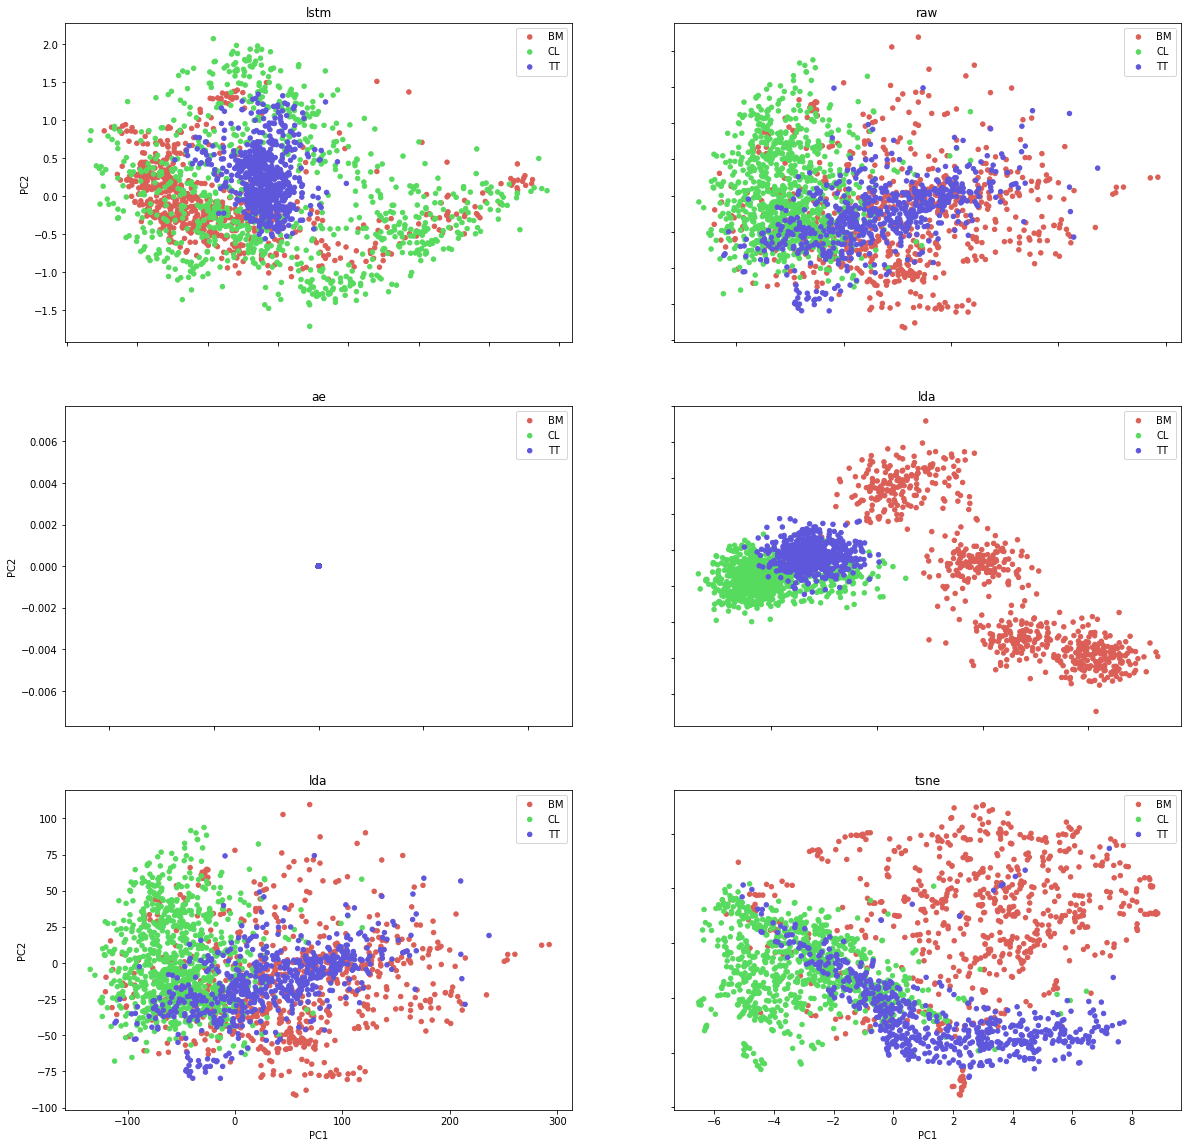

In [15]:
param = {'kind':'scatter', 'x':'PC1', 'y':'PC2', # 'xlim':(0, 1.0), 'ylim':(0,9), 
         'sharex':True, 'sharey':True, 'legend':True, 's':20} 
color_specie = lstm['specie'].unique()
rgb_values = sns.color_palette("hls", len(color_specie))
color_map = dict(zip(color_specie, rgb_values))

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
def do_fig_byspecie(feat, title, x, y):
    grouped = feat.groupby('specie')
    for key, group in grouped:
        group.plot(ax=ax[x,y], label=key, color=group['specie'].map(color_map), title=title, **param)

        
do_fig_byspecie(lstm, 'lstm', 0, 0)
do_fig_byspecie(raw, 'raw', 0, 1)
do_fig_byspecie(ae, 'ae', 1, 0)
do_fig_byspecie(lda, 'lda', 1, 1)
do_fig_byspecie(lsa, 'lda', 2, 0)
do_fig_byspecie(tsne, 'tsne', 2, 1)
    
plt.show()